# The 2017 X-class flare observed with GOES-16 and HRC shield rate proxy calibration

From Brian Kress (NOAA affiliate):

<blockquote>
The Sept. 2017 GOES-16 SGPS dataset and comparison plots with GOES-13 and -15 EPS/EPEAD are now available under the "Special Event Data" tab on the NOAA-NCEI website.
<br><br>
https://www.ngdc.noaa.gov/stp/satellite/goes-r.html
<br><br>
ftp://ftp.ngdc.noaa.gov/STP/goesr/solar_proton_events/sgps_sep2017_event_data/
<br><br>
A paper describing SGPS measurements, this dataset and applied corrections will be available soon.
</blockquote>

In particular, he verified that
<blockquote>
(...) both G14 and G15 have P5 background rates 0.016-0.019 (p/cm^2-s-sr-MeV), in 2017 to 2020, in the data archived under https://www.ngdc.noaa.gov/stp/satellite/goes/dataaccess.html. Given that G14 and G15 are in agreement in the NCEI data, I expect the lower SWPC G14 backgrounds [that MTA recorded in realtime] are due to some difference in SWPC’s processing of G14 vs. G15, not instrument level differences. My guess is that there was some background subtraction and floor being used on G14, but I’m really not sure of this. Questions about it would have to be directed at SWPC.
</blockquote>

Comment on comparing background levels from different instruments:

<blockquote>
(...) background rates [are] due to GCR counts picked up by the high energy tail ("out-of-band") portion of the response function. The EPEAD (and G16 SGPS) differential channels are designed to measure SEP fluxes with a steep spectrum, not GCRs. The background levels are in general different for different instruments (although we do expect them to be similar for the different EPEADs on G13-G15). Actual GCR fluxes at EPEAD P5 energies are ~10^-5 - 10^-4 (p/cm^2-s-sr-MeV), way below the background level. If we see order of magnitude differences between fluxes reported during, e.g., the Sept. 2017 GLE, then there is some problem, but I would not worry too much about comparing background levels from the different EPEADs and SGPSs.
</blockquote>


## Data sources used in this analysis

  * GOES-16 SGPS data covering the September 2017 flare, "Special Even Data" tab on the NOAA-NCEI website, https://www.ngdc.noaa.gov/stp/satellite/goes-r.html
  * Corresponding GOES 13/15 EPS/EPEAD realtime data archived by the Chandra Team through Replan Central
  * HRC shield rate from the Chandra telemetry archive (MSIDs: 2SHLDART or 2SHLDBRT)
  

## A summary of the analysis

We first perform an initial exploration of the data and compare the profiles of the September 2017 flare observed with the old generation of the GOES satellites with the profiles observed with the GOES-16 satellite (__Cell 10__). We compare the following energy bands:<br>
<code>
OLD                 GOES-16
P4 (15-40 MeV)      P5 (12-25 MeV) and P6 (25-40 MeV)
P5 (38-82 MeV)      P7 (40-80 MeV)
P6 (84-200 MeV)     P8A (83-99 MeV)
</code><br>
Similar comparison plots can also be found online on NOAA-NCEI website: ftp://ftp.ngdc.noaa.gov/STP/goesr/solar_proton_events/sgps_sep2017_event_data/

Next, in __Cell 17__, we plot the HRC shield rate telemetry (2SHLDART, September 2017) together with the __old HRC shield proxy__ (HRC shield rate proxy recorder through Replan Central and computed using the GOES data available prior to GOES-16) which was derived as a linear combination of proton fluxes in the three pre-GOES-16 energy channels listed above as:<br><br>
_OLD HRC PROXY = 6000 x P4 + 270000 x P5 + 100000 x P6_<br><br>
We also plot a proxy obtained by using the same coefficients as in the case of the old proxy but proton fluxes detected by the GOES-16 channels P5, P7, P8A covering energy ranges similar to those of the old GOES channels. One striking difference is the much lower noise level in the __GOES-16 shield proxy__ compared to the OLD proxy.

In __Cell 18__ we show that an arbitrary correction applied to the GOES-16 proxy can account for the lower background level of GOES 16 as compared to the earlier GOES satellites and the HRC shield. We proceed to the development of a 4 parameter GOES model of the HRC shield rate (a linear combination of three GOES-16 channels plus an additive term to account for the difference in the background level).

We prepare the HRC shield telemetry data and GOES-16 data as follows. We filter out the time intervals corresponding to the radiation zone passages, radiation shutdowns and telemetry saturation (occasionnal 2SHLDART values at the level of 250 counts/sample). We note that the telemetry is sampled every ~8 secs while the GOES-16 data is sampled every 5 min. Modeling requires that the telemetry and GOES-16 proton fluxes share a common time axis. Thus, interpolate the telemetry onto the time axis of the GOES-16 data. This means that we are discarding a significant fraction of the "observations". However, interpolating the GOES-16 data onto the time axis of the HRC shield rate telemetry would introduce "fake" GOES data and could bias the model. The outcome is illustrated in __Cell 26__.

__Cell 27__ contains the definition of the __new model__<br><br>
_HRC PROXY (578A) = c0 x P5 + c1 x P7 + c2 x P8A + c3_<br><br>
We first perform a fit to the entire dataset and demonstrate that the model coefficients _c0, ..., c3_ are consistent in the case of modeling the not normalized (res00, conf00) and normalized (res2, conf2) HRC shield rate telemetry (after accounting for the 256 division). Next, we split the dataset in two subsets: the initial flaring and the main flare. We model the initial flaring and predict the main flare (res01, conf01), and finally we model the main flare and predict the initial flaring (res02, conf02). Modeling results are presented in __Cell 35__. We find that a relatively good fit is obtained if the entire dataset is modeled. The main flare is predicted relatively well based on the model fitted to the initial flaring data. However, the initial flaring data are overestimated by the model fitted only to the main flare dataset. In addition, the _c2_ coefficient is consistent with zero in all the above fits indicating little dependence on the highest energy proton channel.

Thus, we explore a possibility of using a set of three softer energy channels in the HRC shield rate proxy model
<br><br>
_HRC PROXY (567) = c0 x P5 + c1 x P6 + c2 x P7 + c3_<br><br>
We repeat the modeling describe below and present the results in __Cell 44__. All coefficients int he proxy model are now well constrained and the model represents and predicts data well.

Application of the two new models to the December 2020 C-class flare is presented in __Cells 38 and 46__, respectively. 

__Cell 51__ shows a comparison of the old and new proxies as a function of the proton flux for various energy channels.

## Conclusion

The last two cells show tabulated model parameters. It can be seen that the _c0, c1, c2, c3_ parameters differ depending on the time range used to develop a model (the entire dataset, the initial flare, the main flare). For example, the _c0_ coefficient derived from the fit to the entire data set is of the same order of that derived from the fit to the initial flare, the _c1_ coefficient is comparable with that derived from the fit to the main flare, and the _c2_ coefficient is approximately an average of those resulting from the partial models. This could be a signature of spectral variability of the September 2017 flaring event. Future proton events will help to further constrain the _c0, c1, c2, c3_ coefficients.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
import matplotlib.pyplot as plt
import tables
from kadi import events
from astropy.time import Time
from Ska.Numpy import interpolate
from Ska.Matplotlib import plot_cxctime
from Ska.engarchive import fetch as fetch
from Chandra.Time import DateTime
from sherpa.astro import ui
from netCDF4 import Dataset as NCDataset

In [2]:
# start and end times for the 2017 flare file
FLARE_START_TIME = '2017-09-01T00:00:00.000'
FLARE_END_TIME = '2017-10-01T00:00:00.000'

# GOES-16 data format constants
RECORDS = 8640
UNITS = 2
CHANNELS = 14
DIFF_CHANNELS = 13

# HRC Proxy (old) coeeficients, AA * P4 + BB * P5 + CC * P6
AA = 6000
BB = 270000
CC = 100000

# nominal channel energies for HRC proxy, pre-G16
CHAN_LABEL_PRE_G16 = ['P4 (15-40 MeV)','P5 (38-82 MeV)','P6 (84-200 MeV)']
CHANS_PRE_G16_PROXY = {0: 'P4', 1: 'P5', 2: 'P6'}

# nominal channel energies, GOES-16
CHAN_LABEL_G16 = ['P1 (1.0-1.9 MeV)', 'P2A (1.9-2.3 MeV)', 'P2B (2.3-3.4 MeV)',\
                  'P3 (3.4-6.5 MeV)', 'P4 (6.5-12 MeV)', 'P5 (12-25 MeV)',\
                  'P6 (25-40 MeV)', 'P7 (40-80 MeV)',\
                  'P8A (83-99 MeV)', 'P8B (99-118 MeV)', 'P8C (118-150 MeV)',\
                  'P9 (150-275 MeV)', 'P10 (275-500 MeV)', 'P11 (>500 MeV)']

# GOES-16 designations of proton channels proposed for the new proxy
CHANS_G16_PROXY_578 = {5: 'P5', 7: 'P7', 8: 'P8A'}
CHANS_G16_PROXY_567 = {5: 'P5', 6: 'P6', 7: 'P7'}

In [3]:
def convert_j2000_to_chandra_time(times):
    t1 = Time('1998-01-01T00:00:00')
    t2 = Time('2000-01-01T12:00:00')
    dt = t2 - t1  # Difference between two Times
    return times + dt.sec


def get_sgps_g16_proton_data(filename):
    """
    read SGPS Sept. 2017 event data
    B. Kress, Jan. 2021
    """
    # arrays for timestamps and fluxes
    TimeStamp = np.zeros([RECORDS], dtype=np.float64)
    ProtonFluxes = np.zeros([RECORDS, UNITS, CHANNELS], dtype=np.float32)

    # open file and read data set
    ds = NCDataset(filename, mode='r' )
    num_records = len(ds.variables['L2_SciData_TimeStamp'][:])
    TimeStamp[0:num_records] = ds.variables['L2_SciData_TimeStamp'][:]
    ProtonFluxes[0:num_records,:,0:DIFF_CHANNELS] = ds.variables['AvgDiffProtonFlux'][:,:,:]
    ProtonFluxes[0:num_records,:,DIFF_CHANNELS] = ds.variables['AvgIntProtonFlux'][:,:]
    ds.close()
    
    return TimeStamp, ProtonFluxes


def get_arc_goes_data():
    # Retrieve GOES data archived through Replan Central (arc)
    h5_file = "/proj/sot/ska/data/arc3/hrc_shield.h5"
    out = {}

    with tables.open_file(h5_file, mode='r',
                          filters=tables.Filters(complevel=5, complib='zlib')) as h5:
        table = h5.root.data

    h5 = tables.open_file(h5_file, mode='r')
    table = h5.root.data
    
    out['sat'] = table.col('satellite')
    out['secs'] = table.col('time')
    out['p1'] = table.col('p1')
    out['p2a'] = table.col('p2a')
    out['p2b'] = table.col('p2b')
    out['p3'] = table.col('p3')
    out['p4'] = table.col('p4')
    out['p5'] = table.col('p5')
    out['p6'] = table.col('p6')
    out['p7'] = table.col('p7')
    out['p8a'] = table.col('p8a')
    out['p8b'] = table.col('p8b')
    out['p8c'] = table.col('p8c')
    out['p9'] = table.col('p9')
    out['hrc_shield'] = table.col('hrc_shield') # scaled by 256
    h5.close()
    
    return out


def calc_HRCProxy(proton_fluxes):
    # AA, BB, CC are the old HRC proxy coefficients
    hrc_proxy = AA * proton_fluxes[0] + BB * proton_fluxes[1] + CC * proton_fluxes[2]
    return hrc_proxy


def plot_format(ax, k):
    plt.yscale('log')
    plt.ylabel('protons/cm$^2$-s-sr-MeV')
    if k == 0:
        textstr = 'SGPS-X (west)'
    elif k == 1:
        textstr = 'SGPS+X (east)'
    ax.text(0.05, 0.97, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top')
    plt.grid()
    plt.legend(loc='upper right', prop={'size': 10})

    
def plot_flare_profiles(k, old_chan, new_chan, color, ylabel=True):
    """
    Compare pre-GOES-16 and GOES-16 channels
    """
    # GOES-16
    plot_cxctime(TimeStamp, ProtonFluxes[:, k, new_chan], alpha=0.7,
                 color=color, label=f'{CHAN_LABEL_G16[new_chan]} GOES-16')
    # GOES-13/15, arc a.k.a. Replan Central
    plot_cxctime(arc_goes['secs'], arc_goes[f'{CHANS_PRE_G16_PROXY[old_chan].lower()}'],
                 color=color, label=CHAN_LABEL_PRE_G16[old_chan],
                 alpha=0.3)
    ax = plt.gca()
    plot_format(ax, k)
    plt.xlim(DateTime(FLARE_START_TIME).plotdate, DateTime(FLARE_END_TIME).plotdate)
    plt.ylim(8e-5, 300)
    if not ylabel:
        plt.ylabel('')

        
def plot_old_new_proxy(k, arc_time_flt, hrcproxy, hrcproxy_correction, shld_dat):
    
    # GOES-13/15, arc a.k.a. Replan Central
    # already scaled by 256
    plot_cxctime(arc_goes['secs'][arc_time_flt],
                 arc_goes['hrc_shield'][arc_time_flt],
                 color='lightgray', label="OLD GOES proxy")
    # GOES-16
    plot_cxctime(TimeStamp, hrcproxy // 256 + hrcproxy_correction,
                 color='gray', label="GOES-16 proxy")
    # HRC shield rate, Chandra telemetry
    plot_cxctime(shld_dat.times, shld_dat.vals // 256,
                 color='C0', marker='.', ls='None',
                 label=f"2SHLDART (HRC shield telemetry)")
    # Limits
    plt.hlines([80], DateTime(FLARE_START_TIME).plotdate, DateTime(FLARE_END_TIME).plotdate,
               color='goldenrod', linestyle=(0, (10, 4)))
    plt.hlines([250], DateTime(FLARE_START_TIME).plotdate, DateTime(FLARE_END_TIME).plotdate,
               color='darkred', linestyle=(0, (10, 4)))

    ax = plt.gca()
    plot_format(ax, k)
    plt.ylabel('2SHLDART // 256')

    
def plot_fit_results(res, conf, proton_fluxes, idx0, idx1, label, plot_old=True):
    
    if plot_old:
        # OLD/NEW proxy
        plot_cxctime(TimeStamp, HRCProxy_2017 // 256,
                     color='gray', label="Old coeffs, new GOES chans", alpha=0.5)
    
    # HRC shield rate new proxy model (new data, new coefficients)
    model, model_min, model_max = get_model_min_max(res, conf, proton_fluxes)

    ax = plt.gca()
    ax.fill_between(DateTime(TimeStamp).plotdate, model_min // 256, model_max // 256,
                    color='k', label=f'{label}, 1 sigma conf region')

    # HRC shield rate (telemetry)
    plot_cxctime(TimeStamp[okg], shld2017_intrpl // 256,
                 color='lightsteelblue', marker='.', ls='None')    
    # Section with HRC shield rate that was modeled
    plot_cxctime(TimeStamp[okg][idx0:idx1], shld2017_intrpl[idx0:idx1] // 256,
                 color='C0', marker='.', ls='None', 
                 label="2SHLDART (fitted HRC shield telemetry)")
    # MTA limits
    plt.hlines([80], DateTime(FLARE_START_TIME).plotdate, DateTime(FLARE_END_TIME).plotdate,
               color='goldenrod', linestyle=(0, (10, 4)))
    plt.hlines([250], DateTime(FLARE_START_TIME).plotdate, DateTime(FLARE_END_TIME).plotdate,
               color='darkred', linestyle=(0, (10, 4)))
    plot_format(ax, k)
    plt.ylabel('2SHLDART // 256')
    

def plot_proxy_ratio(proxy_ratio, title, chans):
    for ii, key in enumerate(chans.keys()):
        plt.plot(ProtonFluxes[:, k, key], proxy_ratio, '.', color=f'C{ii + 1}',
                 linestyle='None', label=f'{chans[key]} GOES-16', alpha=0.1)
    plt.loglog()
    plt.grid()
    plt.xlabel('protons/cm$^2$-s-sr-MeV')
    plt.ylabel('GOES-16 proxy / OLD GOES proxy')
    plt.legend()
    plt.ylim(3e-2, 4)
    plt.title(title)

# The data

In [4]:
# Input file, GOES-16, Sep 2017
# proton fluxes in units of #/cm2-s-sr-keV
# time in j2000
filename = 'g16-flare/se_sgps-l2-avg5m_g16_s20172440000000_e20172732355000_v2_0_0.nc'
TimeStamp, ProtonFluxes = get_sgps_g16_proton_data(filename)

In [5]:
# Convert the times from j2000 to Chandra time
TimeStamp = convert_j2000_to_chandra_time(TimeStamp)
# Convert flux units from #/cm2-s-sr-keV to #/cm2-s-sr-MeV
ProtonFluxes = ProtonFluxes * 1000

In [6]:
print("Using the following GOES-16 channels for the HRC proxy comparison:")
for key in CHANS_G16_PROXY_578.keys():
    print(CHAN_LABEL_G16[key])

Using the following GOES-16 channels for the HRC proxy comparison:
P5 (12-25 MeV)
P7 (40-80 MeV)
P8A (83-99 MeV)


In [7]:
# Realtime GOES data archived through Replan Central 
# NOTE: Replan Central contains hrc_shield proxy that is normalized (/ 256)
arc_goes = get_arc_goes_data()

In [8]:
# Time filters for GOES data archived through arc a.k.a Replan Central

# September 2017, X-class flare
arc2017_flt = (arc_goes['hrc_shield'] > 0.1) & \
              (arc_goes['secs'] > DateTime(FLARE_START_TIME).secs) & \
              (arc_goes['secs'] < DateTime(FLARE_END_TIME).secs)

# December 2020, C-class flare
arc2020_flt = (arc_goes['hrc_shield'] > 0.1) & \
              (arc_goes['secs'] > DateTime('2020:329').secs) & \
              (arc_goes['secs'] < DateTime('2020:354').secs)
        
# January 2021, quiet
arc2021_flt = (arc_goes['hrc_shield'] > 0.1) & \
              (arc_goes['secs'] > DateTime('2021:001').secs) &\
              (arc_goes['secs'] < DateTime('2021:031').secs)

# The 2017 X-class flare profile seen by different GOES satellites

In [9]:
# SGPS-X (west) unit
k = 0

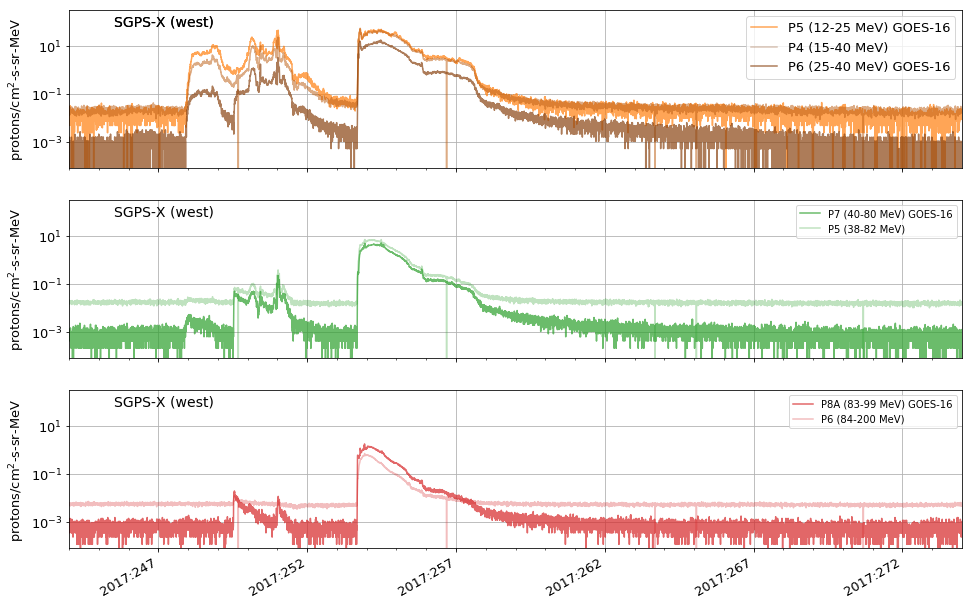

In [10]:
plt.figure(figsize=[16, 11])
for ii in range(3):
    plt.subplot(3, 1, ii + 1)
    plot_flare_profiles(k,
                        list(CHANS_PRE_G16_PROXY.keys())[ii],
                        list(CHANS_G16_PROXY_578.keys())[ii],
                        f'C{ii + 1}')
    
# Add GOES P6 to the top panel
plt.subplot(3, 1, 1)
plot_flare_profiles(k, 0, 6, 'saddlebrown')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid();

__Figure:__ The 2017 strong flare observed with an old generation GOES satellite (Replan Central archive) and a new generation GOES-16 satellite (NOAA website). The "pale" colors represent the three channels on GOES-13/14/15 that were used to compute the HRC shield proxy. The darker colors represent the three GOES-16 channels proposed to replace the old channels. It can be noticed that the background level differs significantly between the old and new GOES instruments (up to > an order of magnitude), and the difference is not constant between the channels. 

Confirming that GOES-16 levels in those three channels before and after the flare are in agreement with the levels observed in Jan 2021:

In [11]:
for key in CHANS_G16_PROXY_578.keys():
    print(CHAN_LABEL_G16[key],
          # Mean of 100 samples before the 2017 flare
          np.mean(ProtonFluxes[:, k, key][:100]),
          # Mean of 100 samples after the 2017 flare
          np.mean(ProtonFluxes[:, k, key][-100:]),
          # Mean of samples in Jan 2021
          np.mean(arc_goes[CHANS_G16_PROXY_578[key].lower()][arc2021_flt]))

P5 (12-25 MeV) 0.0129387 0.0121133 0.0119037899315
P7 (40-80 MeV) 0.000790953 0.000711229 0.0017884542648
P8A (83-99 MeV) 0.000662636 0.000611664 0.000811565649103


# HRC shield proxy - initial exploration

In [12]:
# HRC shield rate from the Chandra telemetry archive, 2SHLD(A/B)RT
# Sep 2017, X-class flare
shld2017 = fetch.Msid('2shldart', start=FLARE_START_TIME, stop=FLARE_END_TIME)

In [13]:
okrz = (events.rad_zones.table['tstart'] > DateTime(FLARE_START_TIME).secs) &\
       (events.rad_zones.table['tstop'] < DateTime(FLARE_END_TIME).secs)

In [14]:
events.rad_zones.table[okrz]

start,stop,tstart,tstop,dur,orbit,orbit_num,perigee
str21,str21,float64,float64,float64,int64,int64,str21
2017:245:18:28:23.275,2017:246:09:06:22.229,620764172.459,620816851.413,52678.954,2496,2496,2017:246:01:09:43.782
2017:248:11:03:22.676,2017:249:00:16:57.630,620996671.86,621044286.814,47614.954,2497,2497,2017:248:16:37:16.295
2017:251:01:10:10.909,2017:251:16:09:45.863,621220280.093,621274255.047,53974.9539999,2498,2498,2017:251:08:04:41.115
2017:253:16:41:10.694,2017:254:07:41:09.649,621448939.878,621502938.833,53998.955,2499,2499,2017:253:23:32:00.881
2017:256:08:56:29.503,2017:256:22:46:03.503,621680258.687,621730032.687,49774.0,2500,2500,2017:256:14:59:15.893
2017:258:23:19:39.135,2017:259:14:37:37.135,621904848.319,621959926.319,55078.0,2501,2501,2017:259:06:26:45.901
2017:261:15:28:41.488,2017:262:06:57:10.488,622135790.672,622191499.672,55709.0,2502,2502,2017:261:21:54:51.370
2017:264:06:56:51.425,2017:264:21:14:00.425,622364280.609,622415709.609,51428.9999999,2503,2503,2017:264:13:23:35.171
2017:266:21:24:23.667,2017:267:14:17:42.667,622589132.851,622649931.851,60799.0,2504,2504,2017:267:04:52:14.754


In [15]:
# HRC proxy, use old coefficients on new GOES-16 channels
proton_fluxes_578 = []
for key in CHANS_G16_PROXY_578.keys():
    proton_fluxes_578.append(ProtonFluxes[:, k, key])
    
HRCProxy_2017 = calc_HRCProxy(proton_fluxes_578)

In [16]:
# From kadi database of major events
scs107s = events.scs107s.filter(start='2017:249', stop='2017:258').table
rad_zones = events.rad_zones.filter(start='2017:244', stop='2017:274').table

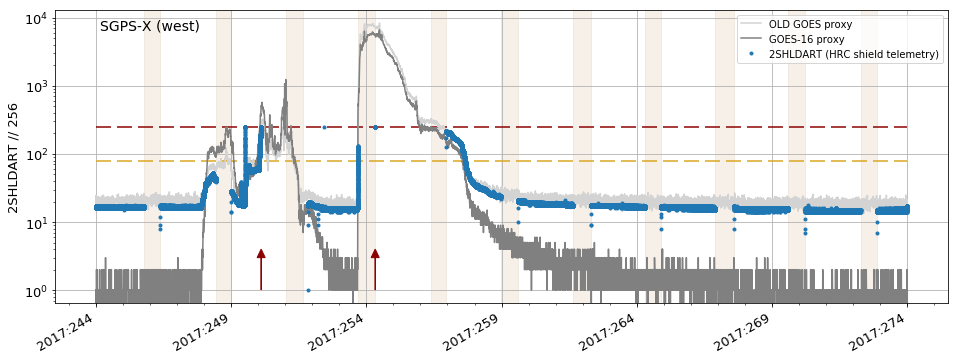

In [17]:
hrcproxy_correction = 0
plt.figure(figsize=[16, 6])
# Note: Scaling by 256 implemented inside the plotting routine
plot_old_new_proxy(k, arc2017_flt, HRCProxy_2017, hrcproxy_correction, shld2017)
ax = plt.gca()

for rad_zone in rad_zones:
    x1 = DateTime(rad_zone['start']).plotdate
    x2 = DateTime(rad_zone['stop']).plotdate
    ax.axvspan(x1, x2, alpha=0.2, color='tan')

for scs107 in scs107s:
    plt.arrow(DateTime(scs107['start']).plotdate, 1, 0, 2,
              head_width=0.3, head_length=1, color='darkred')

__Figure:__ Chandra's HRC shield rate telemetry __(blue)__ and its proxies: __(light gray)__ computed using the OLD GOES data and __(dark gray)__ computed using the GOES-16 data. __The same old coefficients used for both proxies.__ The yellow dashed line marks MTA's yellow alert limit. The red dashed line marks 250 counts/sample at which RADMON will trigger SCS 107 (SI safing action). The red arrows mark the two instances of SCS 107 run over the considered time period. Shaded areas mark radiation zones. As expected, the difference in bgd level between the two generations of the GOES satellites translates into the difference in the noise level of HRC proxies. This can be interpreted as a signature of the bgd level difference between the HRC and GOES-16, indicating a need of a 4th additive parameter in the HRC proxy equation.

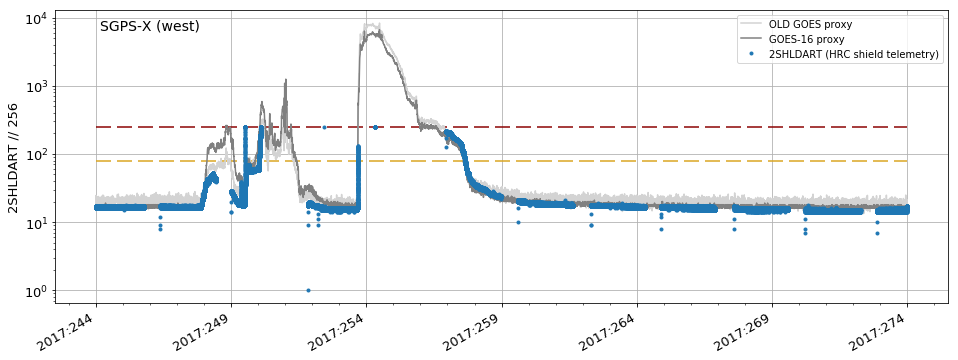

In [18]:
hrcproxy_correction = 16

plt.figure(figsize=[16, 6])
plot_old_new_proxy(k, arc2017_flt, HRCProxy_2017, hrcproxy_correction, shld2017)

__Figure:__ The same as in the cell above but GOES-16 HRC proxy contains an arbitrary additive term, hrcproxy_correction = 16.

# A new HRC shield rate model derived from the Sept. 2017 GOES-16 data

In order to develop a new model, the 2SHLDART telemetry and GOES-16 proton data need to be interpolated onto the same time axis. The telemetry is sampled every ~8 secs while the GOES-16 data is sampled every 5 min. The HRC shield rate telemetry will be interpolated onto the time axis of the GOES-16 data, even though this will mean discarding a significant fraction of the "observations" (the other option, i.e. interpolating the GOES-16 data onto the time axis of HRC shield rate telemetry would introduce "fake" data and could bias the model). Time intervals corresponding to radiation zone passages, radiation shutdowns, and HRC shield rate "saturation", > 248 x 256, will be removed prior to interpolating.

In [19]:
ok1 = shld2017.vals == 255  # radzones
ok2 = shld2017.vals > 248 * 256  # HRC shield rate ``saturation``
ok3 = ok1 | ok2

In [20]:
# Sampling of HRC shield rate telemetry
deltas_t = shld2017.times[ok3][1:] - shld2017.times[ok3][:-1]
deltas_t[:4]

array([ 8.20000041,  8.20000052,  8.20000052,  8.20000041])

In [21]:
ok4 = deltas_t > 8.21  # gaps due to radiation shutdown

In [22]:
# Start and stop times of gaps due to radzones, saturation or radiation shutdowns
gap_tstart = np.insert(shld2017.times[ok3][1:][ok4], 0, shld2017.times[ok1][0])
gap_tstop = np.append(shld2017.times[ok3][:-1][ok4], shld2017.times[ok1][-1])

In [23]:
pad = 30

In [24]:
# Filter the GOES-16 proton data, introduce data gaps as in the HRC shield rate telemetry
okg = np.ones(len(TimeStamp), dtype=bool)
for t1, t2 in zip(gap_tstart, gap_tstop):
    ok = (TimeStamp > t1 - pad) & (TimeStamp < t2 + pad)
    okg = okg & ~ok

In [25]:
# Interpolate 2SHLDART data on GOES-16 time axis with matching gaps.
# Note: GOES-16 data are sampled every 5 min, 2SHLDART data are sampled
# every ~8 sec, so this way we are discarding some good 2SHLDART data
# but not `inventing` any GOES-16 data as would be the case of we
# interpolated the GOES-16 data on the 2SHLDART time axis
shld2017_intrpl = interpolate(shld2017.vals, shld2017.times, TimeStamp[okg])

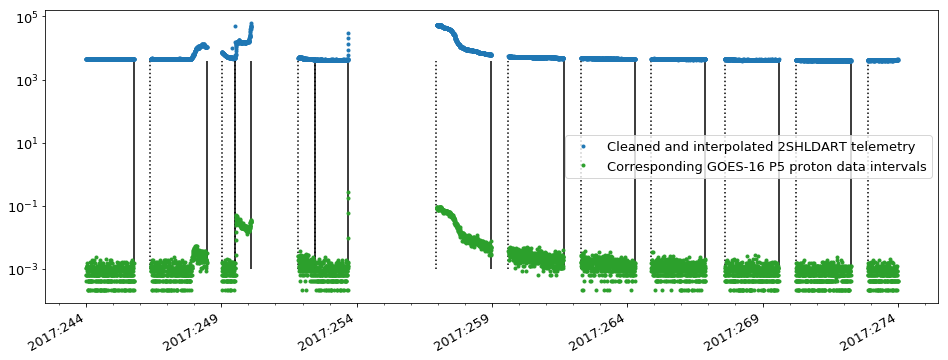

In [26]:
plt.figure(figsize=(16, 6))
plot_cxctime(TimeStamp[okg], shld2017_intrpl,
             color='C0', ls='None', marker='.', label='Cleaned and interpolated 2SHLDART telemetry')
plt.vlines(DateTime(gap_tstart).plotdate, 1e-3, 4000, linestyle='-')
plt.vlines(DateTime(gap_tstop).plotdate, 1e-3, 4000, linestyle=':')
plot_cxctime(TimeStamp[okg], ProtonFluxes[:, k, 7][okg],
             ls='None', marker='.', color='C2',
             label='Corresponding GOES-16 P5 proton data intervals')
plt.legend()
plt.yscale('log');

__FIgure:__ Cleaned 2SHLDART telemetry (removed gaps due to radzones, telemetry saturation and radiation shutdowns), and corresponding GOES-16 proton data intervals that will be used to derive the new model.

## Model definition and modeling strategy

First, we perform a fit to the entire dataset and demonstrate that the model coefficients _c0, ..., c3_ are consistent in the case of modeling the not normalized _(res00, conf00)_ and normalized _(res2, conf2)_ HRC shield telemetry (after accounting for the 256 division). Next, we split the dataset into two parts: the initial flaring and the main flare. We model the initial flaring and predict the main flare _(res01, conf01)_. Finally, we model the main flare and predict the initial flaring _(res02, conf02)_.

In [27]:
# Fitting functions

def hrc_shield_proxy(pars, proton_fluxes):
    if len(pars) == 3:
        # OLD HRC proxy model
        c0, c1, c2 = pars
        return c0 * proton_fluxes[0] + c1 * proton_fluxes[1] + c2 * proton_fluxes[2]   
    elif len(pars) == 4:
        # NEW HRC proxy model
        c0, c1, c2, c3 = pars
        return c0 * proton_fluxes[0] + c1 * proton_fluxes[1] + c2 * proton_fluxes[2] + c3


def hrc_shield_proxy_model(proton_fluxes):
    
    def sherpa_func(pars, x=None):
        return hrc_shield_proxy(pars, proton_fluxes)
    
    return sherpa_func


def fit_hrc_proxy(times, vals, nparams, idx0, idx1, chans):
    data_id = 1
    comp_names = [f'c{i}' for i in range(nparams)]
    ui.set_method('simplex')
    ui.set_stat('cstat')

    proton_fluxes = []
    for key in chans.keys():
        proton_fluxes.append(ProtonFluxes[:, k, key][okg][idx0:idx1])
    
    ui.load_user_model(hrc_shield_proxy_model(proton_fluxes), 'model')
        
    ui.add_user_pars('model', comp_names)
    ui.set_model(data_id, 'model')
    ui.load_arrays(data_id,
                   np.array(times[idx0:idx1]),
                   np.array(vals[idx0:idx1]))

    # Initial fit values
    fmod = ui.get_model_component('model')
    for i in range(nparams):
        comp_name = f'c{i}'
        setattr(fmod, comp_name, pars0[i])
        comp = getattr(fmod, comp_name)
        comp.max = 3e7
        comp.min = 0
        
    for i in range(10):
        ui.fit(data_id)

    ui.set_conf_opt('max_rstat', 250)
    ui.set_conf_opt('sigma', 1)
    ui.conf()
    conf = ui.get_confidence_results()
    return ui.get_fit_results(), conf


def get_model_min_max(res, conf, proton_fluxes):
    model = hrc_shield_proxy(res.parvals, proton_fluxes)
    
    parmins = list(conf.parmins)
    for ii, parmin in enumerate(parmins):
        if parmin is None:
            parmins[ii] = res.parvals[ii]
    
    vals_min = np.array(res.parvals) + np.array(parmins)
    vals_max = np.array(res.parvals) + np.array(conf.parmaxes)
    model_min = hrc_shield_proxy(vals_min, proton_fluxes)
    model_max = hrc_shield_proxy(vals_max, proton_fluxes)
    return model, model_min, model_max

In [28]:
idx_start = 0
idx_end = len(shld2017_intrpl)
idx_half = 1800

### Fit the entire dataeset

In [29]:
# Fit not normalized telemetry
# Fit the entire dataeset
pars0 = [AA, BB, CC, 4000]
npars = len(pars0)
res00, conf00 = fit_hrc_proxy(TimeStamp[okg], shld2017_intrpl, npars,
                              idx_start, idx_end,
                              chans=CHANS_G16_PROXY_578)

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 5.13668e+06
Final fit statistic   = 872132 at function evaluation 4087
Data points           = 5765
Degrees of freedom    = 5761
Probability [Q-value] = 0
Reduced statistic     = 151.385
Change in statistic   = 4.26455e+06
   model.c0       1324.41     
   model.c1       511018      
   model.c2       1469.11     
   model.c3       3832        
Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 872132
Final fit statistic   = 868859 at function evaluation 4087
Data points           = 5765
Degrees of freedom    = 5761
Probability [Q-value] = 0
Reduced statistic     = 150.817
Change in statistic   = 3272.86
   model.c0       1331.38     
   model.c1       508639      
   model.c2       0.00449353  
   model.c3       3836.86     
Dataset               = 1
Method                = neldermead
Statistic             = 

In [30]:
# OLD coefficients
AA, BB, CC

(6000, 270000, 100000)

In [31]:
# Fit normalized telemetry
# To demonstrate consistency with res00, conf00 (fit to not normalized telemetry).
# Resulting coefficients are of the order of res00.parvals * 256.
pars0 = [AA, BB, CC, 16]
npars = len(pars0)
res2, conf2 = fit_hrc_proxy(TimeStamp[okg], shld2017_intrpl // 256, npars,
                            idx_start, idx_end,
                            chans=CHANS_G16_PROXY_578)

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 3.69347e+07
Final fit statistic   = 7.41261e+06 at function evaluation 4087
Data points           = 5765
Degrees of freedom    = 5761
Probability [Q-value] = 0
Reduced statistic     = 1286.69
Change in statistic   = 2.95221e+07
   model.c0       1233.36     
   model.c1       0.0293362   
   model.c2       4.8696e-05  
   model.c3       352.254     
Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 7.41261e+06
Final fit statistic   = 3475.57 at function evaluation 4086
Data points           = 5765
Degrees of freedom    = 5761
Probability [Q-value] = 1
Reduced statistic     = 0.603292
Change in statistic   = 7.40914e+06
   model.c0       5.20426     
   model.c1       1992        
   model.c2       0.000113085 
   model.c3       14.1809     
Dataset               = 1
Method                = neldermead
Statisti

### Fit the initial flare, predict the main flare

In [32]:
# Fit not normalized telemetry
# Fit the initial flare, predict the main flare
pars0 = [AA, BB, CC, 4000]
npars = len(pars0)
res01, conf01 = fit_hrc_proxy(TimeStamp[okg], shld2017_intrpl, npars,
                              idx_start, idx_half,
                              chans=CHANS_G16_PROXY_578)

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 4.36062e+06
Final fit statistic   = 372840 at function evaluation 4087
Data points           = 1800
Degrees of freedom    = 1796
Probability [Q-value] = 0
Reduced statistic     = 207.594
Change in statistic   = 3.98778e+06
   model.c0       1410.23     
   model.c1       368031      
   model.c2       0.0314101   
   model.c3       4077.18     
Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 372840
Final fit statistic   = 372840 at function evaluation 4087
Data points           = 1800
Degrees of freedom    = 1796
Probability [Q-value] = 0
Reduced statistic     = 207.594
Change in statistic   = 0.136889
   model.c0       1409.63     
   model.c1       368033      
   model.c2       0.103756    
   model.c3       4077.23     
Dataset               = 1
Method                = neldermead
Statistic             =

### Fit the main flare, predict the initial flares

In [33]:
# Fit not normalized telemetry
# Fit the main flare, predict the initial flares
pars0 = [AA, BB, CC, 4000]
npars = len(pars0)
res02, conf02 = fit_hrc_proxy(TimeStamp[okg], shld2017_intrpl, npars,
                              idx_half + 100, idx_end,
                              chans=CHANS_G16_PROXY_578)

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 771209
Final fit statistic   = 198326 at function evaluation 993
Data points           = 3865
Degrees of freedom    = 3861
Probability [Q-value] = 0
Reduced statistic     = 51.3664
Change in statistic   = 572884
   model.c0       10953.9     
   model.c1       257936      
   model.c2       0.00253155  
   model.c3       3942.03     
Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 198326
Final fit statistic   = 198043 at function evaluation 404
Data points           = 3865
Degrees of freedom    = 3861
Probability [Q-value] = 0
Reduced statistic     = 51.2932
Change in statistic   = 282.558
   model.c0       11300.7     
   model.c1       247150      
   model.c2       0.00720072  
   model.c3       3950.68     
Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initia

In [34]:
# Fit not normalized telemetry with a 3-param model
# Not a good fit, reduced statistic > 3000
#pars0 = [AA, BB, CC]
#npars = len(pars0)
#res1, conf1 = fit_hrc_proxy(TimeStamp[okg], shld2017_intrpl, npars, 
#                            idx_start, idx_end,
#                            chans=CHANS_G16_PROXY_578)

__NOTE:__ Compared to the old proxy coefficients, in the new model the dependence on the highest energy channel becomes very weak: c2 consistent with zero in all fits, probably because the noise is modeled explicitly and/or the 2017 flare was rather soft. Future flaring episodes will allow to determine if the dependence of the P8A channel needs to beincluded in the proxy model.

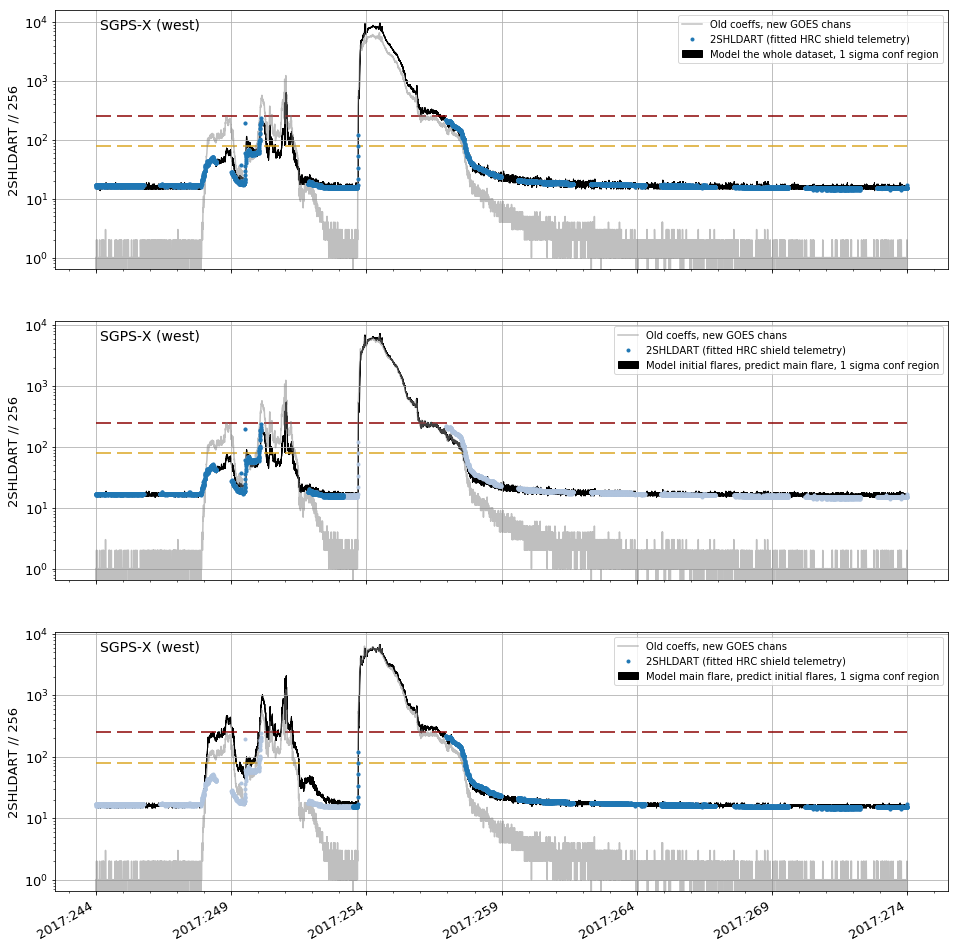

In [35]:
plt.figure(figsize=[16, 18])
plt.subplot(3, 1, 1)
plot_fit_results(res00, conf00, proton_fluxes_578, idx_start, idx_end,
                 label='Model the whole dataset')
plt.subplot(3, 1, 2)
plot_fit_results(res01, conf01, proton_fluxes_578, idx_start, idx_half,
                 label='Model initial flares, predict main flare')
plt.subplot(3, 1, 3)
plot_fit_results(res02, conf02, proton_fluxes_578, idx_half + 100, idx_end,
                 label='Model main flare, predict initial flares')

__Top:__ The HRC shield rate telemetry (dark blue) and the new HRC proxy model (black) compared with the HRC proxy derived using the old coefficients and new GOES-16 channels (gray). The model accounts well for the telemetry at the time of the initial flaring and at the time of the main flare. __Middle:__ Model was derived using the telemetry at the time of the initial flaring (dark blue) and extrapolated to predict the HRC shield rate past day 253 (light blue). The model predicts relatively well the HRC telemetry coinciding with the rise and decay of the main flare. __Bottom:__ Model was derived using the telemetry at the time of the main flare (dark blue) and extrapolated to predict the HRC shield rate prior to day ~253 (light blue). The model overpredicts the HRC shield rate at the time of the initial flaring, days 248-249 and 252.

### Application of the model to the December 2020 C-class flare data

In [36]:
# Dec 2020, C/M-class flare
# Removed intervals corresponding to rad zone passages
# with 30 sec (~3 samples) padding on each end
shld2020 = fetch.Msid('2shldbrt', start='2020:329', stop='2020:354')
interval_pad = 30 # secs
events.rad_zones.interval_pad = (interval_pad, interval_pad)
shld2020.remove_intervals(events.rad_zones)

In [37]:
# HRC proxy at the time of the C/M Dec 2020 class flare
# using old coefficients on new G16 channels
proton_fluxes_2020_578 = [arc_goes['p5'][arc2020_flt],
                          arc_goes['p7'][arc2020_flt],
                          arc_goes['p8a'][arc2020_flt]]
HRCProxy_Cflare = calc_HRCProxy(proton_fluxes_2020_578)

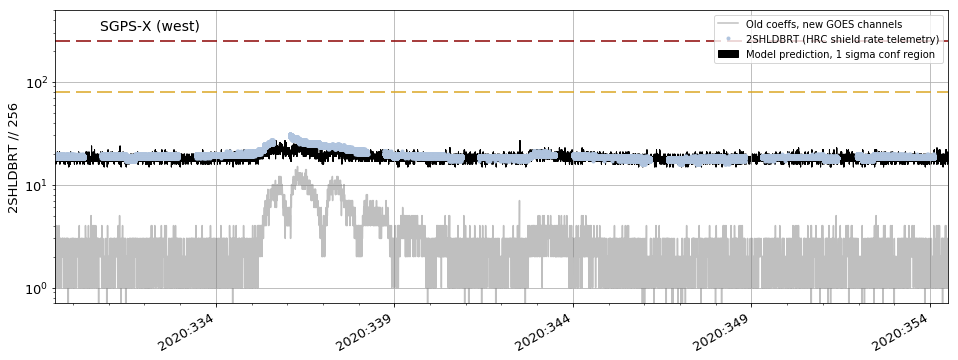

In [38]:
plt.figure(figsize=[16, 6])

# Old coefficients, new GOES channels
plot_cxctime(arc_goes['secs'][arc2020_flt], HRCProxy_Cflare // 256,
             color='gray', label="Old coeffs, new GOES channels", alpha=0.5)

x1 = DateTime('2020:329').plotdate
x2 = DateTime('2020:354').plotdate
plt.xlim([x1, x2])
ax = plt.gca()

# HRC shield rate, model fitted to the complete Sept. 2017 dataset
model, model_min, model_max = get_model_min_max(res00, conf00, proton_fluxes_2020_578)
ax.fill_between(DateTime(arc_goes['secs'][arc2020_flt]).plotdate,
                model_max // 256, model_min // 256,
                color='k', label='Model prediction, 1 sigma conf region')

plot_cxctime(shld2020.times, shld2020.vals // 256,
             color='lightsteelblue', marker='.', ls='None',
             label="2SHLDBRT (HRC shield rate telemetry)")

plt.hlines([250], x1, x2, color='darkred', linestyle=(0, (10, 4)))
plt.hlines([80], x1, x2, color='goldenrod', linestyle=(0, (10, 4)))
plot_format(ax, k)
plt.ylim(7e-1, 5e2)
plt.ylabel('2SHLDBRT // 256');

__Figure:__ The HRC shield rate telemetry at the time of the December 2020 C-class flare __(blue)__ and the prediction of the new 4-parameter HRC shield rate model __(black)__ derived using the GOES-16 channels P5, P7, P8A. Linear combination of the GOES-16 channels P5, P7, P8A with the old coefficients is plotted for comparison __(gray)__.

# Repeat the modeling using a different set of GOES-16 channels

The _c2_ coefficient is consistent with zero in the case of a combination of the P5, P7 and P8A GOES-16 channels, and the model appears to lack flexibility when fitting the main flare and attempting to predict the initial flaring. Here, we explore if a combination of the softer GOES-16 energy channels (P5, P6, P7) can lead to more robust results.

As before, we first perform a fit to the entire dataset _(res10, conf10)_. Next, we model the initial flaring and predict the main flare _(res11, conf11)_. Finally, we model the main flare and predict the initial flaring _(res12, conf12)_.

In [39]:
for key in CHANS_G16_PROXY_567.keys():
    print(CHAN_LABEL_G16[key],
          # Mean of 100 samples before the 2017 flare
          np.mean(ProtonFluxes[:, k, key][:100]),
          # Mean of 100 samples after the 2017 flare
          np.mean(ProtonFluxes[:, k, key][-100:]),
          # Mean of samples in Jan 2021
          np.mean(arc_goes[CHANS_G16_PROXY_567[key].lower()][arc2021_flt]))

P5 (12-25 MeV) 0.0129387 0.0121133 0.0119037899315
P6 (25-40 MeV) 0.000489268 0.000526094 0.000602858564119
P7 (40-80 MeV) 0.000790953 0.000711229 0.0017884542648


### Fit the entire dataset

In [40]:
# Fit not normalized telemetry
# Fit the entire dataeset
pars0 = [AA, BB, CC, 4000]
npars = len(pars0)
res10, conf10 = fit_hrc_proxy(TimeStamp[okg], shld2017_intrpl, npars,
                              idx_start, idx_end,
                              chans=CHANS_G16_PROXY_567)

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 3.71087e+07
Final fit statistic   = 342686 at function evaluation 1194
Data points           = 5765
Degrees of freedom    = 5761
Probability [Q-value] = 0
Reduced statistic     = 59.4839
Change in statistic   = 3.6766e+07
   model.c0       142.825     
   model.c1       64737.5     
   model.c2       162505      
   model.c3       4127.04     
Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 342686
Final fit statistic   = 342686 at function evaluation 144
Data points           = 5765
Degrees of freedom    = 5761
Probability [Q-value] = 0
Reduced statistic     = 59.4838
Change in statistic   = 0.0026639
   model.c0       142.826     
   model.c1       64737.9     
   model.c2       162505      
   model.c3       4127.04     
Dataset               = 1
Method                = neldermead
Statistic             = 

### Fit the initial flare, predict the main flare

In [41]:
# Fit not normalized telemetry
# Fit the initial flare, predict the main flare
pars0 = [AA, BB, CC, 4000]
npars = len(pars0)
res11, conf11 = fit_hrc_proxy(TimeStamp[okg], shld2017_intrpl, npars,
                              idx_start, idx_half,
                              chans=CHANS_G16_PROXY_567)

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 1.65881e+07
Final fit statistic   = 229384 at function evaluation 959
Data points           = 1800
Degrees of freedom    = 1796
Probability [Q-value] = 0
Reduced statistic     = 127.719
Change in statistic   = 1.63587e+07
   model.c0       297.179     
   model.c1       54112.4     
   model.c2       200547      
   model.c3       4199.63     
Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 229384
Final fit statistic   = 229065 at function evaluation 4086
Data points           = 1800
Degrees of freedom    = 1796
Probability [Q-value] = 0
Reduced statistic     = 127.542
Change in statistic   = 318.814
   model.c0       273.641     
   model.c1       55727.8     
   model.c2       189969      
   model.c3       4210        
Dataset               = 1
Method                = neldermead
Statistic             = c

### Fit the main flare, predict the initial flares

In [42]:
# Fit not normalized telemetry
# Fit the main flare, predict the initial flares
pars0 = [AA, BB, CC, 4000]
npars = len(pars0)
res12, conf12 = fit_hrc_proxy(TimeStamp[okg], shld2017_intrpl, npars,
                              idx_half + 100, idx_end,
                              chans=CHANS_G16_PROXY_567)

Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 2.05022e+07
Final fit statistic   = 100776 at function evaluation 1116
Data points           = 3865
Degrees of freedom    = 3861
Probability [Q-value] = 0
Reduced statistic     = 26.101
Change in statistic   = 2.04014e+07
   model.c0       1983.75     
   model.c1       59012.3     
   model.c2       148719      
   model.c3       4092.06     
Dataset               = 1
Method                = neldermead
Statistic             = cstat
Initial fit statistic = 100776
Final fit statistic   = 99402.7 at function evaluation 4087
Data points           = 3865
Degrees of freedom    = 3861
Probability [Q-value] = 0
Reduced statistic     = 25.7453
Change in statistic   = 1373.3
   model.c0       1057.55     
   model.c1       65889.2     
   model.c2       131405      
   model.c3       4114.87     
Dataset               = 1
Method                = neldermead
Statistic             = c

In [43]:
# HRC proxy, use old coefficients on new GOES-16 channels
proton_fluxes_567 = []
for key in CHANS_G16_PROXY_567.keys():
    proton_fluxes_567.append(ProtonFluxes[:, k, key])

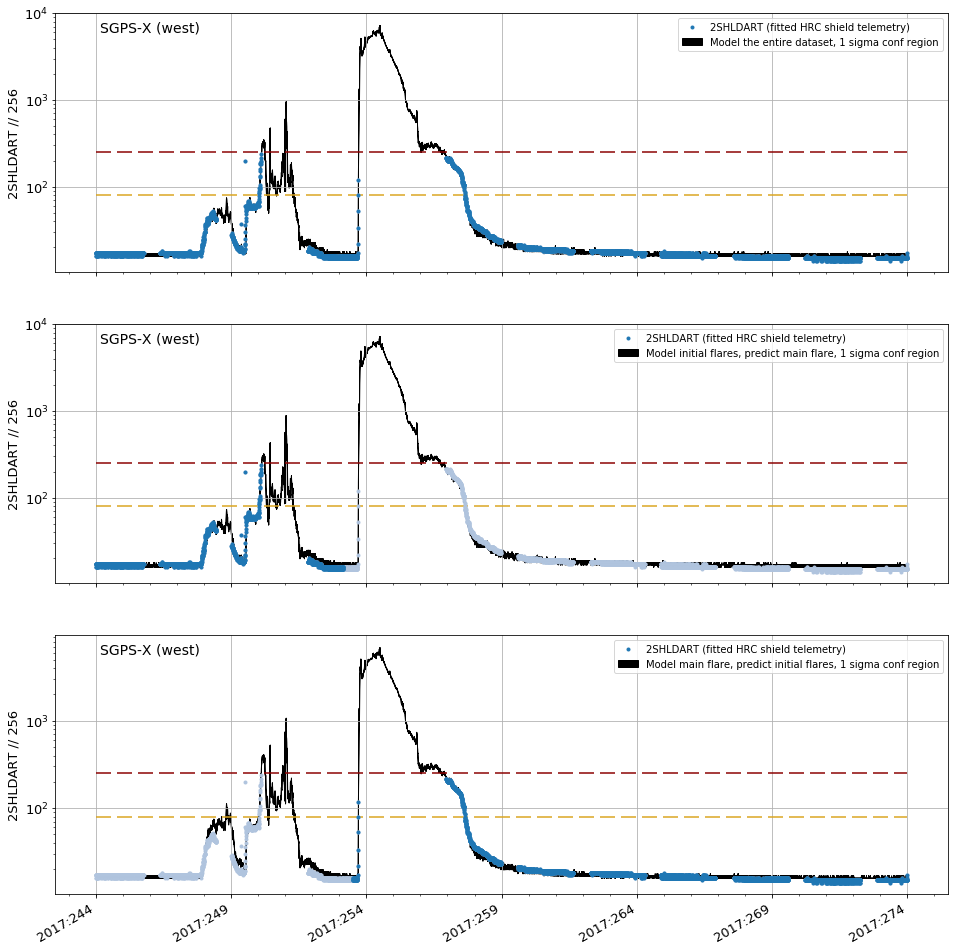

In [44]:
plt.figure(figsize=[16, 18])
plt.subplot(3, 1, 1)
plot_fit_results(res10, conf10, proton_fluxes_567, idx_start, idx_end,
                 label='Model the entire dataset', plot_old=False)
plt.subplot(3, 1, 2)
plot_fit_results(res11, conf11, proton_fluxes_567, idx_start, idx_half,
                 label='Model initial flares, predict main flare', plot_old=False)
plt.subplot(3, 1, 3)
plot_fit_results(res12, conf12, proton_fluxes_567, idx_half + 100, idx_end,
                 label='Model main flare, predict initial flares', plot_old=False)

__Top:__ The HRC shield rate telemetry (dark blue) and the new HRC proxy model (black). The model accounts well for the telemetry at the time of the initial flaring and at the time of the main flare. __Middle:__ Model was derived using the telemetry at the time of the initial flaring (dark blue) and extrapolated to predict the HRC shield rate past day 253 (light blue). The model predicts well the HRC telemetry coinciding with the rise and decay of the main flare. __Bottom:__ Model was derived using the telemetry at the time of the main flare (dark blue) and extrapolated backwards to predict the HRC shield rate prior to day ~253 (light blue). The model predicts well the HRC shield rate at the time of the initial flaring.

In [45]:
# HRC proxy at the time of the C/M Dec 2020 class flare
# using old coefficients on new G16 channels
proton_fluxes_2020_567 = [arc_goes['p5'][arc2020_flt],
                          arc_goes['p6'][arc2020_flt],
                          arc_goes['p7'][arc2020_flt]]

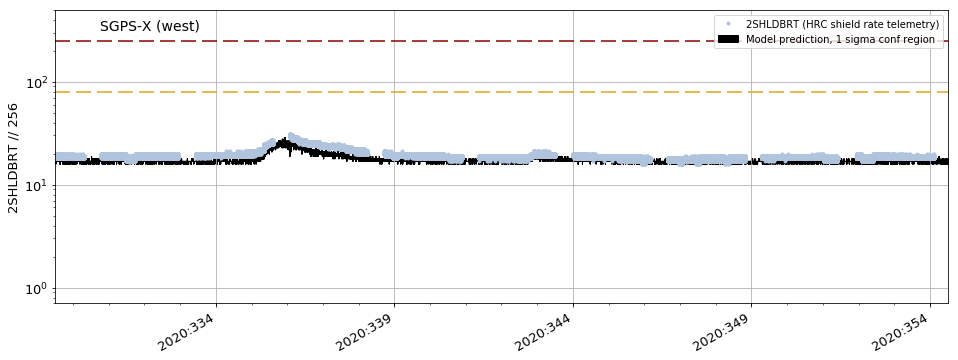

In [46]:
plt.figure(figsize=[16, 6])

plot_cxctime(shld2020.times, shld2020.vals // 256,
             color='lightsteelblue', marker='.', ls='None',
             label="2SHLDBRT (HRC shield rate telemetry)")

x1 = DateTime('2020:329').plotdate
x2 = DateTime('2020:354').plotdate
plt.xlim([x1, x2])
ax = plt.gca()

# HRC shield rate, model fitted to the complete Sept. 2017 dataset
model, model_min, model_max = get_model_min_max(res10, conf10, proton_fluxes_2020_567)
ax.fill_between(DateTime(arc_goes['secs'][arc2020_flt]).plotdate,
                model_max // 256, model_min // 256,
                color='k', label='Model prediction, 1 sigma conf region')

plt.hlines([250], x1, x2, color='darkred', linestyle=(0, (10, 4)))
plt.hlines([80], x1, x2, color='goldenrod', linestyle=(0, (10, 4)))
plot_format(ax, k)
plt.ylim(7e-1, 5e2)
plt.ylabel('2SHLDBRT // 256');

__Figure:__ The HRC shield rate telemetry at the time of the December 2020 C-class flare __(blue)__ and the prediction of the new 4-parameter HRC shield rate model __(black)__ derived using the GOES-16 channels P5, P6, P7.

## Ratio of NEW to OLD proxy vs proton flux (2017)

In [47]:
# Interpolate arc (Replan Central) HRC shield rate proxy
# Replan Central proxy includes // 256
# on the time axis of the NOAA G16 data
yout = interpolate(arc_goes['hrc_shield'][arc2017_flt], arc_goes['secs'][arc2017_flt], TimeStamp)

In [48]:
proxy_ratio = (HRCProxy_2017 // 256) / yout

In [49]:
hrcproxy_correction = 16
proxy_ratio_bgd_corrected = (HRCProxy_2017 // 256 + hrcproxy_correction) / yout

In [50]:
proxy_ratio_new_fit_578 = (hrc_shield_proxy(res00.parvals, proton_fluxes_578) // 256) / yout
proxy_ratio_new_fit_567 = (hrc_shield_proxy(res10.parvals, proton_fluxes_567) // 256) / yout

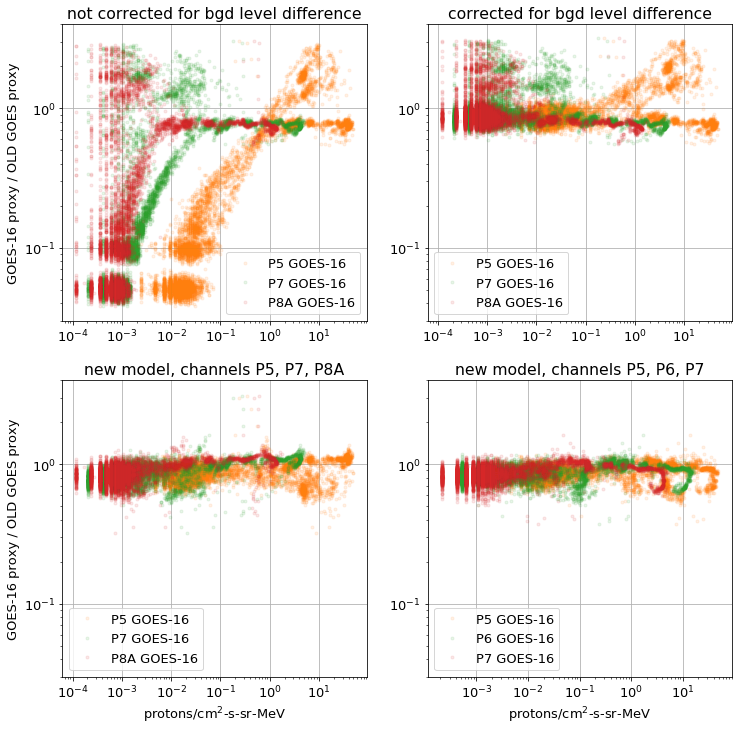

In [51]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plot_proxy_ratio(proxy_ratio, 
                 title='not corrected for bgd level difference',
                 chans=CHANS_G16_PROXY_578)
plt.xlabel('')

plt.subplot(2, 2, 2)
plot_proxy_ratio(proxy_ratio_bgd_corrected,
                 title='corrected for bgd level difference',
                 chans=CHANS_G16_PROXY_578)
plt.xlabel('')
plt.ylabel('')

plt.subplot(2, 2, 3)
plot_proxy_ratio(proxy_ratio_new_fit_578,
                 title='new model, channels P5, P7, P8A',
                 chans=CHANS_G16_PROXY_578)

plt.subplot(2, 2, 4)
plot_proxy_ratio(proxy_ratio_new_fit_567,
                 title='new model, channels P5, P6, P7',
                 chans=CHANS_G16_PROXY_567)
plt.ylabel('');

__Figure:__ The apparent dependence of the proxy ratio on proton flux appears to be due to the difference in the backgorund level between the old and new generations of the GOES satellites.

In [52]:
from astropy.table import Table

In [53]:
modnames = ['Mod_578A_full', 'Mod_578A_init', 'Mod_578A_main',
            'Mod_567_full', 'Mod_567_init', 'Mod_567_main']

In [54]:
cs = []
for ii, res in enumerate([res00, res01, res02, res10, res11, res12]):
    cs.append(list(res.parvals))

In [55]:
cmins = []
cmaxes = []
for ii, conf in enumerate([conf00, conf01, conf02, conf10, conf11, conf12]):
    cmins.append(list(conf.parmins))
    cmaxes.append(list(conf.parmaxes))

In [56]:
cs = np.array(cs).T
cmins = np.array(cmins).T
cmaxes = np.array(cmaxes).T

In [57]:
tab = Table([modnames, cs[0], cmins[0], cmaxes[0],
                       cs[1], cmins[1], cmaxes[1],
                       cs[2], cmins[2], cmaxes[2],
                       cs[3], cmins[3], cmaxes[3]],
              names=['modname',
                     'c0.val', 'c0.min', 'c0.max',
                     'c1.val', 'c1.min', 'c1.max',
                     'c2.val', 'c2.min', 'c2.max',
                     'c3.val', 'c3.min', 'c3.max'])

In [58]:
# Replace None for c2.min with zero
idx = np.isnan(tab['c2.min'].astype(float))
tab['c2.min'][idx] = 0

In [59]:
# Format cell values
cols = tab.colnames
cols.remove('modname')
for col in cols:
    tab[col].info.format = '%7.0f'

In [60]:
# c0 x P5 + c1 x P7 + c2 x P8A + c3
tab[:3]

modname,c0.val,c0.min,c0.max,c1.val,c1.min,c1.max,c2.val,c2.min,c2.max,c3.val,c3.min,c3.max
str13,float64,object,float64,float64,object,float64,float64,object,float64,float64,object,float64
Mod_578A_full,1331,-2,1,508640,-224,167,0,0,0,3836,-1,1
Mod_578A_init,1410,-2,2,368039,-253,781,0,0,12,4077,-2,2
Mod_578A_main,11301,-7,7,247150,-813,508,0,0,1,3951,-1,1


# Conclusion

The table below shows the coefficients of the _c0 x P5 + c1 x P6 + c2 x P7 + c4_ model applied to the entire data set, the initial flare and the main flare. It can be seen that the coefficients differ depending on the time range of the data used in modeling. For example, the _c0_ coefficient derived from the fit to the entire data set is of the same order of that derived from the fit to the initial flare, the _c1_ coefficient is comparable with that derived from the fit to the main flare, and the _c2_ coefficient is approximately an average of those resulting from the partial models. This could be a signature of spectral variability of the September 2017 flaring event. Future proton events will help to further constrain the _c0, c1, c2, c3_ coefficients.

In [61]:
# c0 x P5 + c1 x P6 + c2 x P7 + c3
tab[-3:]

modname,c0.val,c0.min,c0.max,c1.val,c1.min,c1.max,c2.val,c2.min,c2.max,c3.val,c3.min,c3.max
str13,float64,object,float64,float64,object,float64,float64,object,float64,float64,object,float64
Mod_567_full,143,-2,2,64738,-36,34,162505,-427,424,4127,-1,1
Mod_567_init,274,-3,3,55728,-113,90,189972,-438,402,4210,-2,2
Mod_567_main,1058,-42,35,65889,-167,199,131406,-512,526,4115,-1,1
